In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("ethylene_CO2s2.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
a.iloc[:,3:] = scaler.fit_transform(a.iloc[:,3:])

In [4]:
for i in range(1,17):
 a[f"d{i}"] = 0
for i in range(1,17):
 a[f"d{i}"][1:] = (a.iloc[1:,2+i].reset_index(drop=True) - a.iloc[0:-1,2+i].reset_index(drop=True))/(a.iloc[1:,0].reset_index(drop=True) - a.iloc[0:-1,0].reset_index(drop=True))

C:\Users\user\AppData\Local\Temp\ipykernel_9072\2356464268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[f"d{i}"][1:] = (a.iloc[1:,2+i].reset_index(drop=True) - a.iloc[0:-1,2+i].reset_index(drop=True))/(a.iloc[1:,0].reset_index(drop=True) - a.iloc[0:-1,0].reset_index(drop=True))


In [5]:
a = a[:100000]
a

,Time(seconds),CO,Ethylene,1,2,3,4,5,6,7,...,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16
0,95.100,0.0,0.0,0.142631,0.162500,0.002244,0.001444,0.095149,0.218868,0.001663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,95.201,0.0,0.0,0.144838,0.162435,0.001452,0.001383,0.099827,0.220344,0.000388,...,-0.012629,-0.001072,0.014100,0.008128,-0.005294,-0.009394,0.069824,0.065504,-0.010145,0.001872
2,95.302,0.0,0.0,0.145269,0.162142,0.001389,0.001533,0.098350,0.216796,0.000457,...,0.000688,0.004509,-0.014659,-0.013462,0.002639,0.008810,-0.071237,-0.115755,0.015013,0.004452
3,95.402,0.0,0.0,0.144463,0.162102,0.001801,0.001671,0.096404,0.219617,0.000559,...,0.001023,-0.002115,-0.002271,-0.012342,-0.001669,-0.007455,0.072522,0.083918,-0.012531,-0.003462
4,95.501,0.0,0.0,0.143795,0.162546,0.001477,0.001174,0.096123,0.218827,0.001059,...,0.005042,0.000318,0.012760,0.000924,0.004737,-0.005669,-0.048119,0.004360,0.003397,-0.004266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10095.095,0.0,10.0,0.230721,0.008798,0.566903,0.570259,0.402713,0.280503,0.559956,...,0.004557,-0.000660,-0.015111,-0.010551,0.021273,0.016583,-0.079214,-0.150964,-0.000559,0.002018
99996,10095.195,0.0,10.0,0.228841,0.008668,0.567579,0.569908,0.403848,0.282926,0.559494,...,-0.004614,0.006706,-0.007338,0.010935,-0.003070,-0.012085,0.014605,0.069451,0.012073,0.001852
99997,10095.295,0.0,10.0,0.227743,0.008635,0.567860,0.571016,0.401747,0.280261,0.559587,...,0.000927,-0.001850,0.019801,-0.007281,-0.013904,0.003963,0.027003,0.032414,0.000559,-0.003477
99998,10095.395,0.0,10.0,0.229061,0.008884,0.568082,0.569795,0.399934,0.280399,0.559816,...,0.002293,0.004887,-0.021605,-0.021108,0.006210,0.001791,0.007751,-0.063497,-0.001693,0.005860


In [6]:
c = a.iloc[:,1:3]
c.iloc[:,1] = c.iloc[:,1] * 30
d = a.iloc[:,3:36]
a=0


In [7]:
c

,CO,Ethylene
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
99995,0.0,300.0
99996,0.0,300.0
99997,0.0,300.0
99998,0.0,300.0


In [8]:
n_step = 5
n_input = 32

# LSTM shape
n_lstm1 = 500
n_lstm2 = 500

# fully connected
n_hidden = 500
n_output = 2

bs = 32

In [9]:
train_x_list = []
train_y_list = []
for i in range(len(c)-n_step):
    train_x = d.iloc[i:i + n_step,:]
    train_x_list.append(train_x)

    train_y = c.iloc[i+n_step,:]
    train_y_list.append(train_y)

train_data = np.array(train_x_list[:80000])
train_label = np.array(train_y_list[:80000])

test_data = np.array(train_x_list[80000:])
test_label = np.array(train_y_list[80000:])

test_data = test_data[0:-(len(test_data)%32)]
train_x_list=0
train_y_list=0

In [10]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

def sm(x):
  return K.abs(x)*K.sigmoid(30*(x+0.8))*K.tanh(5*x)

def sm2(x):
  return x*K.sigmoid(10*(x+1))*K.tanh(x)*K.tanh(10*(x+0.2))
    
def sm3(x):
  return 0.5*x*(K.tanh(100*x)+1.02)

get_custom_objects().update({'ca': Activation(sm)})

def clf(y_true, y_pred):
   err1 = tf.math.abs(y_true - y_pred)
   loss_v= tf.math.reduce_mean(err1)
   return loss_v

opt = tf.keras.optimizers.Adam(
    learning_rate=0.1
)

In [11]:
inputs = tf.keras.layers.Input(shape = (n_step, n_input),batch_size=32)

x = tf.keras.layers.LSTM(n_lstm1, return_sequences = True)(inputs)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.LSTM(n_lstm1, return_sequences = True)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.LSTM(n_lstm1, return_sequences = True)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.LSTM(n_lstm2)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(n_hidden,activation='relu',kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.1)(x)

x2 = tf.constant([],dtype=float)
for n,i in enumerate(inputs):
    x2 = tf.concat([x2,i[-1]],axis=-1)
x2 = tf.reshape(x2,shape=(bs,32))

x2 = tf.keras.layers.Dense(n_hidden,activation='relu',kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dropout(0.1)(x2)

x = tf.keras.layers.Concatenate(axis=-1)([x,x2])
x = tf.keras.layers.Dense(n_hidden*2,activation='relu',kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs =  tf.keras.layers.Dense(n_output,activation='linear')(x)

lstm_network = tf.keras.Model(inputs, outputs)
lstm_network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(32, 5, 32)]        0           []                               
                                                                                                  
 tf.__operators__.getitem (Slic  (5, 32)             0           ['input_1[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (32,)               0           ['tf.__operators__.getitem[0][0]'
 icingOpLambda)                                                  ]                                
                                                                                              

In [12]:
lstm_network.compile(optimizer = 'adam', 
                     loss = 'mean_squared_error', 
                     metrics = ['mse'])

In [13]:
lstm_network.fit(train_data, train_label,epochs = 5)

Epoch 1/5
 303/2500 [==>...........................] - ETA: 21s - loss: 14301.7607 - mse: 14301.7607

In [114]:
predict = lstm_network.predict(test_data)
predict2 = lstm_network.predict(train_data)

2500/2500 [==============================] - 9s 3ms/step


In [115]:
np.unique(predict[:,0]), np.unique(predict[:,1])

(array([-28.634483, -26.765797, -26.692904, ..., 297.51324 , 298.36493 ,
        301.79056 ], dtype=float32),
 array([-11.496424,  -9.827401,  -9.420616, ..., 362.54883 , 364.9539  ,
        365.7878  ], dtype=float32))

In [116]:
lp = len(predict)

In [117]:
from sklearn.metrics import r2_score
r2_score(test_label[:lp], predict),r2_score(train_label, predict2)

(0.5575212645785859, 0.9189806061499194)

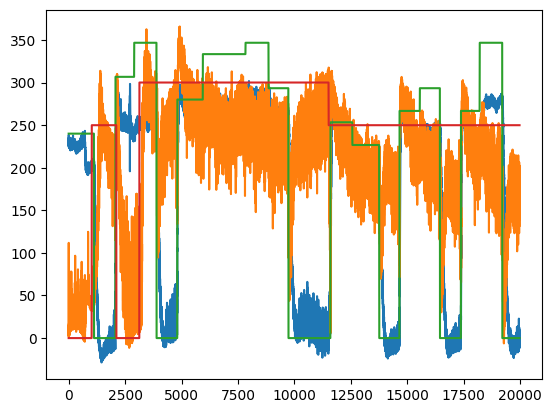

In [118]:
plt.plot(range(lp),predict)
plt.plot(range(lp),np.array(test_label)[:lp])

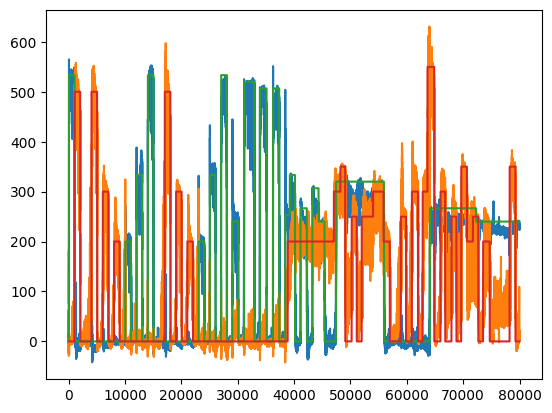

In [119]:
plt.plot(range(80000),predict2)
plt.plot(range(80000),np.array(train_label)[:])